# Working with Dates and Times in R

### Course Description


### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

### Explication of geom
http://sape.inf.usi.ch/quick-reference/ggplot2/geom (type of geom in R)

https://www.datanalytics.com/libro_r/elementos-de-un-grafico-en-ggplot2.html
other: http://docs.ggplot2.org/current/


In [13]:
library(readr)
releases<-read_csv("https://assets.datacamp.com/production/repositories/1435/datasets/603b5835e87ce55c22221491406854cecf213898/rversions.csv")
akl_daily_raw<-read_csv("https://assets.datacamp.com/production/repositories/1435/datasets/f6590278193112325a874cb69cb94d7fbca5732f/akl_weather_daily.csv")
akl_weather_hourly_2016<-read_csv("https://assets.datacamp.com/production/repositories/1435/datasets/0b0ef636e2a69936ef8236108bfd2261647f5e9e/akl_weather_hourly_2016.csv")


Parsed with column specification:
cols(
  major = col_double(),
  minor = col_double(),
  patch = col_double(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)
Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_double(),
  min_temp = col_double(),
  mean_temp = col_double(),
  mean_rh = col_double(),
  events = col_character(),
  cloud_cover = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  month = col_double(),
  mday = col_double(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_double(),
  date_utc = col_datetime(format = "")
)


## 1) Dates and Times in R
R doesn't know something is a date or time unless you tell it. In this chapter you'll learn about some of the ways R stores dates and times by exploring how often R versions are released, and how quickly people download them. You'll also get a sneak peek at what you'll learn in the following chapters.

### 1.1) Introduction to dates
there are a lot way to write a date and its depends in where country or zone we are, so it's necessary to turn out there is is a global standard calle ISO 8601, that specifies the correct way to share data to avoid all confusion, it says order the components in decresing unit that is year, month and day,  but also a few other details about the date.

For example, each component has a fixed number of digits, year has a four and day and month two, if you need one digit, you must pad it with leading zeros.

You don´t have to use a separator, but if you do it must be a dash in date ... "-"

Now if you try typing in the consolo a date like 2003-02-27 you´ll obtain 1974 like result,  other way "2003-02-27" you´ll obtain a string, this is because it´s necesary explicity to write "this is a date" with the as (dot) Date function.

    as.Date("2003-02-27")
    str(as.Date("2003-02-27"))
    
there are also a couple of packages that will automatically import dates in a wider range of formats like `readr or anytime`

In [1]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")

str(april_10_2014)

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"
 Date[1:1], format: "2014-04-10"


#### 1.1.1) Automatic import
Sometimes you'll need to input a couple of dates by hand using `as.Date()` but it's much more common to have a column of dates in a data file.

Some functions that read in data will automatically recognize and parse dates in a variety of formats. In particular the import functions, like `read_csv()`, in the readr package will recognize dates in a few common formats.

There is also the `anytime()` function in the anytime package whose sole goal is to automatically parse strings as dates regardless of the format.

    Intrunctions
    Use read_csv() to read in the CSV file rversions.csv as releases.
    Use str() to examine the structure of the date column. Notice it's already a Date object.
    We've loaded anytime and created an object called sep_10_2009. Use the anytime() function to parse sep_10_2009.
    

In [10]:
# Load the readr package
library(readr)

# Use read_csv() to import rversions.csv
#releases <- read_csv("rversions.csv")

# Examine the structure of the date column
str(releases$date)

# Load the anytime package
library(anytime)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


Warning message:
"package 'anytime' was built under R version 3.5.3"

[1] "2009-09-10 CDT" "2009-09-10 CDT" "2009-09-10 CDT" "2009-09-10 CDT"

### 1.2) Why use dates?
Once an object is a date, you can plot and math with it and get the result you´d expect like:

#### 1.2.1) Plotting
If you plot a Date on the axis of a plot, you expect the dates to be in calendar order, and that's exactly what happens with `plot() or ggplot()`.

In this exercise you'll make some plots with the R version releases data from the previous exercises using ggplot2. There are two big differences when a Date is on an axis:

If you specify limits they must be Date objects.

To control the behavior of the scale you use the `scale_x_date()` function.

Have a go in this exercise where you explore how often R releases occur.


Warning message:
"package 'ggplot2' was built under R version 3.5.3"

Warning message:
"Removed 87 rows containing missing values (geom_path)."

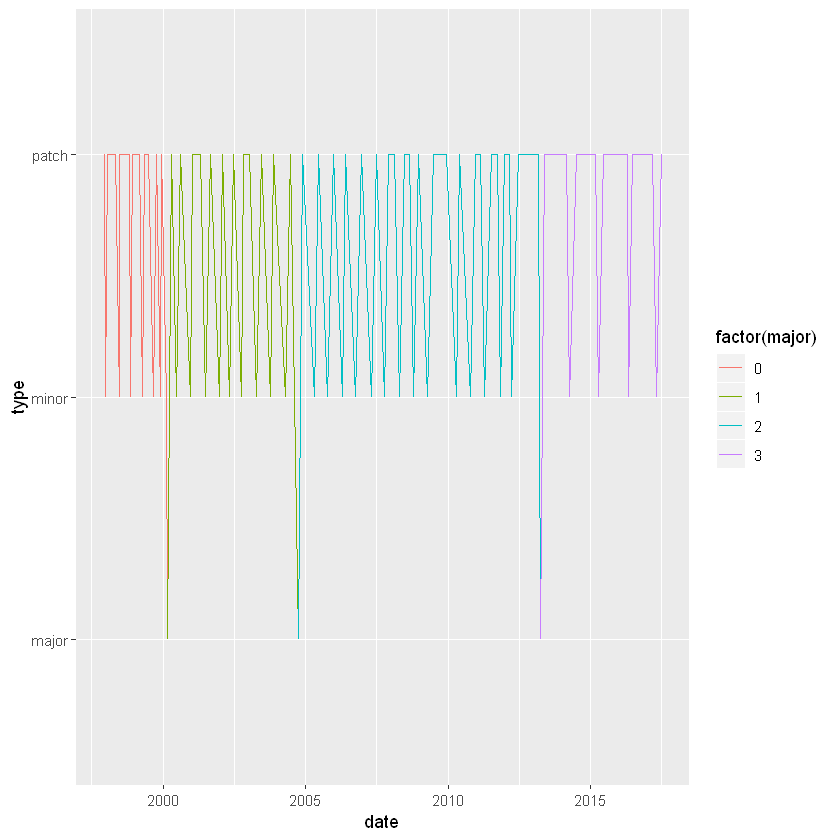

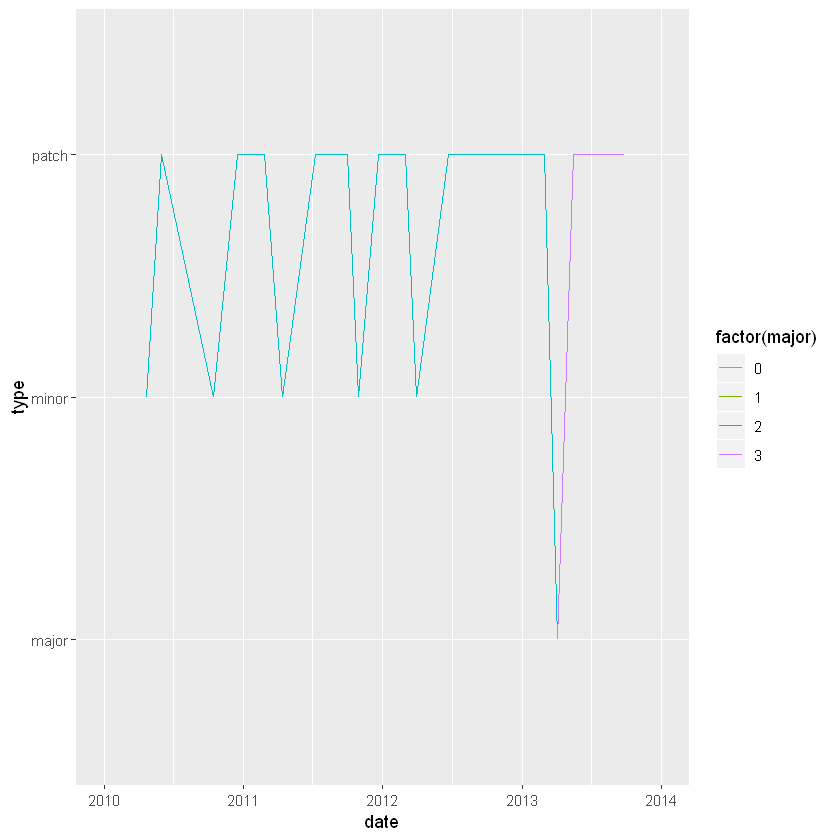

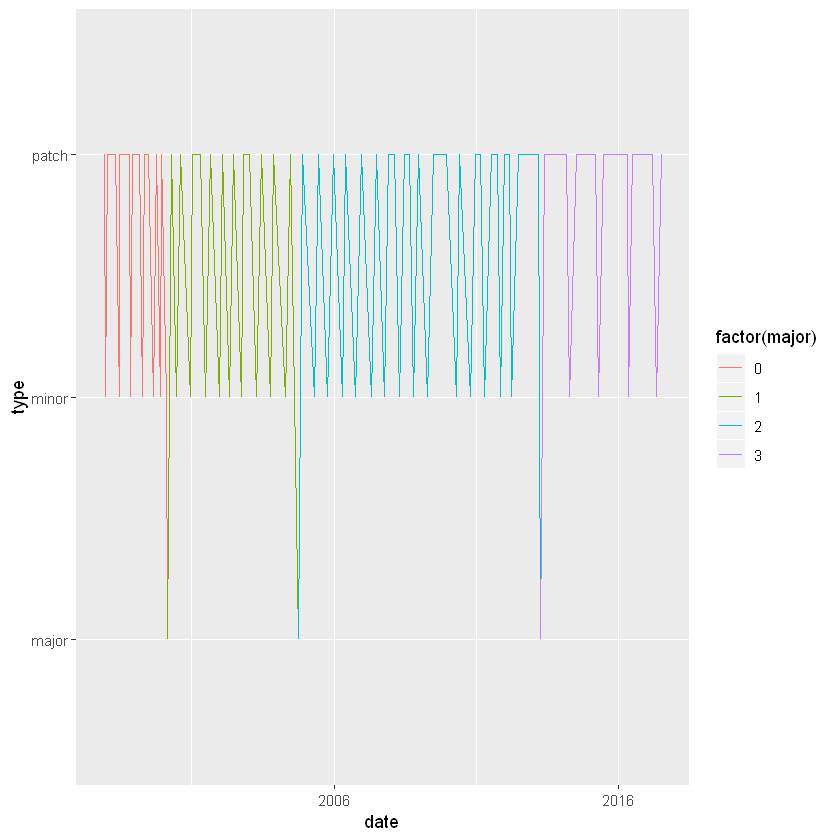

In [11]:
    library(ggplot2)
    #str(releases)

    # Set the x axis to the date column
    ggplot(releases, aes(x = date, y = type)) +
      geom_line(aes(group = 1, color = factor(major)))

    # Limit the axis to between 2010-01-01 and 2014-01-01
    ggplot(releases, aes(x = date, y = type)) +
      geom_line(aes(group = 1, color = factor(major))) +
      xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

    # Specify breaks every ten years and labels with "%Y"
    ggplot(releases, aes(x = date, y = type)) +
      geom_line(aes(group = 1, color = factor(major))) +
      scale_x_date(date_breaks = "10 years", date_labels = "%Y")

#### 1.2.2)  Arithmetic and logical operators
Since Date objects are internally represented as the number of days since 1970-01-01 you can do basic math and comparisons with dates. You can compare dates with the usual logical operators (<, ==, > etc.), find extremes with min() and max(), and even subtract two dates to find out the time between them.

In this exercise you'll see how these operations work by exploring the last R release. You'll see Sys.date() in the code, it simply returns today's date.

    Find the date of the most recent release by calling max() on the date column in releases.
    Find the rows in releases that have the most recent date, by specifying the comparison date == last_release_date in filter()
    Print last_release to see which release this was.
    Calculate how long it has been since the most recent release by subtracting last_release_date from Sys.Date().
    
    
    # Find the largest date
    last_release_date <- max(releases$date)

    # Filter row for last release
    last_release <- filter(releases, date == last_release_date)

    # Print last_release
    last_release

    # How long since last release?
    Sys.Date() - last_release_date

### 1.3) What about time?
ISO 8601 tell us that it´s necesary to write from largest unit to smallest a fixed number of digits and optinally seperating the units with a colon (HH:MM:SS) and when combined with a date, the time is sometimes prefixed with the character `T`, there are two built in types of objects for datatimes in R, `POSIXIt and POSIXct` the first stores a date in a list with components for each unit, whereas the second stores the date as the number of seconds since the beginning of 1970, the same way like as.Date we can convert a string chain to POSIXct with `as.POSIXct` e.g 

In [1]:
a<-as.POSIXct("1970-01-01 00:01:00")
str(a)

 POSIXct[1:1], format: "1970-01-01 00:01:00"


Note: ISO 8601 also allows the specification of a timezone if no time zone is specified it is assumed to be local time

#### 1.3.1) Getting datetimes into R
Just like dates without times, if you want R to recognize a string as a datetime you need to convert it, although now you use `as.POSIXct(). as.POSIXct()` expects strings to be in the format `YYYY-MM-DD HH:MM:SS`.

The only tricky thing is that times will be interpreted in local time based on your machine's set up. You can check your timezone with `Sys.timezone()`. If you want the time to be interpreted in a different timezone, you just set the tz argument of `as.POSIXct()`. You'll learn more about time zones in Chapter 4.

In this exercise you'll input a couple of datetimes by hand and then see that `read_csv()` also handles datetimes automatically in a lot of cases.

    Exercise:
    
    Use as.POSIXct() and an appropriate string to input the datetime corresponding to Oct 1st 2010 at 12:12:00.
    Enter the same datetime again, but now specify the timezone as "America/Los_Angeles".
    Use read_csv() to read in rversions.csv again.
    Examine the structure of the datetime column to verify read_csv() has correctly interpreted it as a datetime.

    #Sys.timezone()

    # Use as.POSIXct to enter the datetime 
    as.POSIXct("2010-10-01 12:12:00")

    # Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
    as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

    # Use read_csv to import rversions.csv
    releases <- read_csv("rversions.csv")

    # Examine structure of datetime column
    str(releases$datetime)

### 1.4) Why lubridate?
lubridate is designed to make working with dates and times as easy as possibles in R, it´s a tidyverse package, which means it obeys some key principles, including playing nicely with R´s existing datatime objects and being designed for humans, not computers, it also means it will fit nicely in your data analysis pipelines that use other tidyverse tools.

## 2) Parsing and Manipulating Dates and Times with lubridate
Dates and times come in a huge assortment of formats, so your first hurdle is often to parse the format you have into an R datetime. This chapter teaches you to import dates and times with the lubridate package. You'll also learn how to extract parts of a datetime. You'll practice by exploring the weather in R's birthplace, Auckland NZ.

### 2.1)  Parsing date with lubridate
You´ll learn first how import package:

1. a whole set of functions whose names correspond to different formats or
2. and the more general purpose parse_date_time, a function where the format is specified as an argument.

so we start, for example:

In [5]:
library(lubridate)
ymd("2013-02-17")
ymd("2013.02.17")
ymd("2013 Feb 27th")

[1] "2013-02-17"

[1] "2013-02-17"

[1] "2013-02-27"

we saw that lubridate can handle a different type of format of dates that are not necessarily in the format ISO, what´s neat about lubridate is that there are a whole family of functions like `ymd` where the function name specifies the expected format of the date like:

`ymd(), ydm(), mdy(), myd(), dmy(), dym()`

there are also functions like this for datetime too the date part of the function name is followed by a underscore, and the `hms, hm or s` like dym_hm, unlike some R´functions, if you don´t specify a timezone, lubridate will asumme UTC, some times you may still run into cases where you need to be more specific the function `parse_date_time` in lubridate, also parse dates, but you specify the order in a separete argument e.g `parse_date_time(x = ___ , order = ___)` the order is a string that describres the order of the component in a date, e.g

In [6]:
parse_date_time(x = "27-02-2013", order = "dmy")

[1] "2013-02-27 UTC"

this function has a handly feature where if the dates you need to parse are in more than one order

| Character | Meaning                  | Character | Meaning                  |
|-----------|--------------------------|-----------|--------------------------|
| d         | Numeric day of the month | a         | Abbreviated weekday      |
| m         | Month of year            | A         | Full weekday             |
| y         | Year with century        | b         | Abbreviated month name   |
| Y         | Year withour century     | B         | Full Month name          |
| H         | Hours (24 hours)         | I         | Hours (12hour)           |
| M         | Minutes                  | p         | AM/PM                    |
| S         | Seconds                  | z         | Timezone,offset from UTC |

In [7]:
parse_date_time(x = c("27-02-2013","2013 Feb 27th"), order = c("dmy","ymd"))

[1] "2013-02-27 UTC" "2013-02-27 UTC"

You can find all the possible formating characters on the help page for this function

#### 2.1.1)  Selecting the right parsing function
lubridate provides a set of functions for parsing dates of a known order. For example, `ymd()` will parse dates with year first, followed by month and then day. The parsing is flexible, for example, it will parse the `m` whether it is numeric (e.g. 9 or 09), a full month name (e.g. September), or an abbreviated month name (e.g. Sep).

All the functions with `y, m and d` in any order exist. If your dates have times as well, you can use the functions that start with `ymd, dmy, mdy or ydm` and are followed by any of `_h, _hm or _hms`.

To see all the functions available look at `ymd()` for dates and `ymd_hms()` for datetimes.

Here are some challenges. In each case we've provided a date, your job is to choose the correct function to parse it.

In [8]:
library(lubridate)

# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

#### 2.1.2) Specifying an order with  `parse_date_time()`
What about if you have something in a really weird order like `dym_msh`? There's no named function just for that order, but that is where parse_date_time() comes in. parse_date_time() takes an additional argument, orders, where you can specify the order of the components in the date.

For example, to parse "2010 September 20th" you could say `parse_date_time("2010 September 20th", orders = "ymd")` and that would be equivalent to using the ymd() function from the previous exercise.

One advantage of parse_date_time() is that you can use more format characters. For example, you can specify weekday names with `A`, `I` for 12 hour time, am/pm indicators with `p` and many others. You can see a whole list on the help page `?parse_date_time.`

Another big advantage is that you can specify a vector of orders, and that allows parsing of dates where multiple formats might be used.

You'll try it out in this exercise



In [9]:
#?parse_date_time
# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "ABdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy", "dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY", "Y"))


Warning message:
"All formats failed to parse. No formats found."

[1] NA

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

### 2.2) Weather in Auckland

#### 2.2.1)Import daily weather data
In practice you won't be parsing isolated dates and times, they'll be part of a larger dataset. Throughout the chapter after you've mastered a skill with a simpler example (the release times of R for example), you'll practice your lubridate skills in context by working with weather data from `Auckland NZ`.

There are two data sets: akl_weather_daily.csv a set of once daily summaries for 10 years, and akl_weather_hourly_2016.csv observations every half hour for 2016. You'll import the daily data in this exercise and the hourly weather in the next exercise.

You'll be using functions from dplyr, so if you are feeling rusty, you might want to review filter(), select() and mutate()

    Exercise: 
    Import the daily data, "akl_weather_daily.csv" with read_csv().
    
    Print akl_daily_raw to confirm the date column hasn't been interpreted as a date. Can you see why?
    
    Using mutate() overwrite the column date with a parsed version of date. You need to specify the parsing function. Hint: the first date should be September 1.
    
    Print akl_daily to verify the date column is now a Date.
    
    Take a look at the data by plotting date on the x-axis and max_temp of the y-axis.


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-09-01,60,51,56,75,NA,4
2007-09-02,60,53,56,82,Rain,4
2007-09-03,57,51,54,78,NA,6
2007-09-04,64,50,57,80,Rain,6
2007-09-05,53,48,50,90,Rain,7
2007-09-06,57,42,50,69,NA,1
2007-09-07,59,41,50,77,NA,4
2007-09-08,59,46,52,80,NA,5
2007-09-09,55,50,52,88,Rain,7
2007-09-10,59,50,54,82,Rain,4


Warning message:
"Removed 1 rows containing missing values (geom_path)."

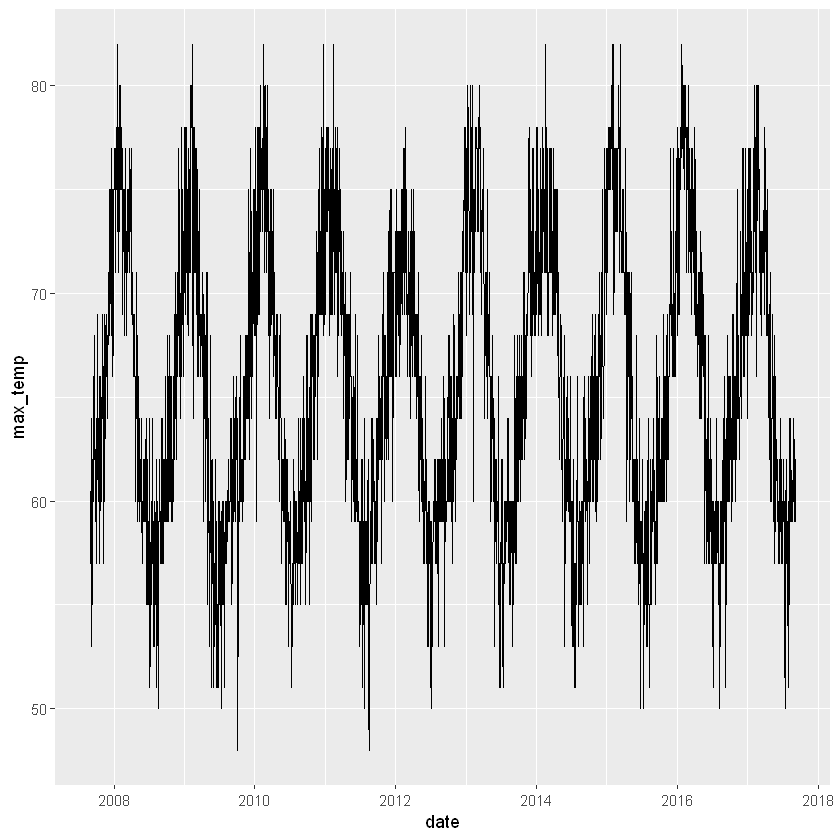

In [15]:
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

# Import CSV with read_csv()
#akl_daily_raw <- read_csv("akl_weather_daily.csv")

# Print akl_daily_raw
head(akl_daily_raw )

# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = ymd(date))

# Print akl_daily
akl_daily

# Plot to check work
ggplot(akl_daily, aes(x = date, y = max_temp)) +
  geom_line() 


#### 2.2.2)Import hourly weather data
The hourly data is a little different. The date information is spread over three columns `year, month and mday`, so you'll need to use `make_date()` to combine them.

Then the time information is in a separate column again, time. It's quite common to find date and time split across different variables. One way to construct the datetimes is to paste the date and time together and then parse them. You'll do that in this exercise.

    Import the hourly data, "akl_weather_hourly_2016.csv" with read_csv(), then print akl_hourly_raw to confirm the date is spread over year, month and mday.
    
    Using mutate() create the column date with using make_date().
    
    We've pasted together the date and time columns. Create datetime by parsing the datetime_string column.
    
    Take a look at the date, time and datetime columns to verify they match up.
    
    Take a look at the data by plotting datetime on the x-axis and temperature of the y-axis.

    library(lubridate)
    library(readr)
    library(dplyr)
    library(ggplot2)

    # Import "akl_weather_hourly_2016.csv"
    akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

    #labels(akl_hourly_raw)
    # Print akl_hourly_raw
    akl_hourly_raw

    # Use make_date() to combine year, month and mday 
    akl_hourly  <- akl_hourly_raw  %>% 
      mutate(date = make_date(year = year, month = month, day = mday))

    #str(akl_hourly)
    # Parse datetime_string 
    akl_hourly <- akl_hourly  %>% 
      mutate(
        datetime_string = paste(date, time, sep = "T"),
        datetime = ymd_hms(datetime_string)
      )

    # Print date, time and datetime columns of akl_hourly
    akl_hourly %>% select(date, time, datetime)

    # Plot to check work
    ggplot(akl_hourly, aes(x = datetime, y = temperature)) +
      geom_line()


### 2.3) Extracting parts of a datetime
| Functions | Extracts                             |
|-----------|--------------------------------------|
| year()    | year with century                    |
| month()   | monto (1-12)                         |
| day()     | day of month(1-31)                   |
| hour()    | hour (0-23)                          |
| min()     | minute(0-59)                         |
| second()  | second(0-59)                         |
| wday()    | weekday(1-7)                         |
| yday()    | day of year a.k.a Julian day (1-366) |

other useful functions:

| Functions   | Extracts                                |
|-------------|-----------------------------------------|
| leap_year() | in leap year (true or false)            |
| am()        | in morning (true or false)              |
| pm()        | in afternoon (true or false)            |
| dst()       | during daylight savings (true or false) |
| quarter()   | quarter of year (1-4)                   |
| semester()  | half of year (1-2)                      |

#### 2.3.1What can you extract?
As you saw in the video, components of a datetime can be extracted by lubridate functions with the same name like year(), month(), day(), hour(), minute() and second(). They all work the same way just pass in a datetime or vector of datetimes.

There are also a few useful functions that return other aspects of a datetime like if it occurs in the morning am(), during daylight savings dst(), in a leap_year(), or which quarter() or semester() it occurs in.

Try them out by exploring the release times of R versions using the data from Chapter 1.


    We've put release_time, the datetime column of the releases dataset from Chapter 1, in your workspace.

    Examine the head() of release_time to verify this is a vector of datetimes.
    Extract the month from release_time and examine the first few with head().
    To see which months have most releases, extract the month then pipe to table().
    Repeat, to see which years have the most releases.
    Do releases happen in the morning (UTC)? Find out if the hour of a release is less than 12 and summarise with mean().
    Alternatively use am() to find out how often releases happen in the morning.
    
    # Examine the head() of release_time
    head(release_time)

    # Examine the head() of the months of release_time
    head(month(release_time))

    # Extract the month of releases 
    month(release_time) %>% table()

    # Extract the year of releases
    year(release_time) %>% table()

    # How often is the hour before 12 (noon)?
    mean(hour(release_time) < 12)

    # How often is the release in am?
    mean(am(release_time))

#### 2.3.2) Adding useful labels
In the previous exercise you found the month of releases:

    head(month(release_time))
    
and received numeric months in return. Sometimes it's nicer (especially for plotting or tables) to have named months. Both the  `month() and wday()` (day of the week) functions have additional arguments label and abbr to achieve just that. Set `label = TRUE ` to have the output labelled with month (or weekday) names, and `abbr = FALSE` for those names to be written in full rather than **abbr**eviated.

For example, try running:

    head(month(release_time, label = TRUE, abbr = FALSE))

    Exercise,releases is now a data frame with a column called datetime with the release time.

    First, see what wday() does without labeling, by calling it on the datetime column of releases and tabulating the result. Do you know if 1 is Sunday or Monday?
    Repeat above, but now use labels by specifying the label argument. Better, right?
    Now store the labelled weekdays in a new column called wday.
    Create a barchart of releases by weekday, facetted by the type of release.

     #result
    library(ggplot2)

    # Use wday() to tabulate release by day of the week
    wday(releases$datetime) %>% table()

    # Add label = TRUE to make table more readable
    wday(releases$datetime, label = TRUE) %>% table()

    # Create column wday to hold labelled week days
    releases$wday <- wday(releases$datetime, label = TRUE)

    # Plot barchart of weekday by type of release
    ggplot(releases, aes(x = wday)) +
      geom_bar() +
      facet_wrap(~ type, ncol = 1, scale = "free_y")

#### 2.3.3) Extracting for plotting
Extracting components from a datetime is particularly useful when exploring data. Earlier in the chapter you imported daily data for weather in Auckland, and created a time series plot of ten years of daily maximum temperature. While that plot gives you a good overview of the whole ten years, it's hard to see the annual pattern.

In this exercise you'll use components of the dates to help explore the pattern of maximum temperature over the year. The first step is to create some new columns to hold the extracted pieces, then you'll use them in a couple of plots.

    Instrunctions
    Use mutate() to create three new columns: year, yday and month that respectively hold the same components of the date column. Don't forget to label the months with their names.
    
    Create a plot of yday on the x-axis, max_temp of the y-axis where lines are grouped by year. Each year is a line on this plot, with the x-axis running from Jan 1 to Dec 31.
    
    To take an alternate look, create a ridgeline plot(formerly known as a joyplot) with max_temp on the x-axis, month on the y-axis, using geom_density_ridges() from the ggridges package.
    
     library(ggplot2)
    library(dplyr)
    library(ggridges)

    # Add columns for year, yday and month
    akl_daily <- akl_daily %>%
      mutate(
        year = year(date),
        yday = yday(date),
        month = month(date, label = TRUE))

    #head(akl_daily)

    # Plot max_temp by yday for all years
    ggplot(akl_daily, aes(x = yday, y = max_temp)) +
      geom_line(aes(group = year), alpha = 0.5)

    # Examine distribtion of max_temp by month
    ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
      geom_density_ridges(stat = "density")

#### 2.3.4)Extracting for filtering and summarizing
Another reason to extract components is to help with filtering observations or creating summaries. For example, if you are only interested in observations made on weekdays (i.e. not on weekends) you could extract the weekdays then filter out weekends, e.g. `wday(date) %in% 2:6`.

In the last exercise you saw that January, February and March were great times to visit Auckland for warm temperatures, but will you need a raincoat?

In this exercise you'll find out! You'll use the hourly data to calculate how many days in each month there was any rain during the day.

    Instrunctions

    Create new columns for the hour and month of the observation from datetime. Make sure you label the month.
    Filter to just daytime observations, where the hour is greater than 8 and less than 22.
    Group the observations first by month, then by date, and summarise by using any() on the rainy column. This results in one value per day
    Summarise again by summing any_rainy. This results in one value per month
    
    # Create new columns hour, month and rainy
    akl_hourly <- akl_hourly %>%
      mutate(
        hour = hour(datetime),
        month = month(datetime, label = TRUE),
        rainy = weather == "Precipitation"
      )

    #str(akl_hourly)
    # Filter for hours between 8am and 10pm (inclusive)
    akl_day <- akl_hourly %>% 
      filter(hour >= 8, hour <= 22)

    # Summarise for each date if there is any rain
    rainy_days <- akl_day %>% 
      group_by(month, date) %>%
      summarise(
        any_rain = any(rainy)
      )

    # Summarise for each month, the number of days with rain
    rainy_days %>% 
      summarise(
        days_rainy = sum(any_rain)
      )

### 2.4) Rounding datetimes
rounding a date will always result in another data object of the same type, there are 3 functions that `round` datatime :

1. round_date() : round to **nearest**
2. ceiling_date() : round **up**
3. floor_date() : round to **down**

Possible values of **unit** like: `second, minute, hour, day, week, month, bimonth, quarter, halfyear or year`

All 3 take a unit argument, that specifies the unit to round to 

#### 2.4.1) Practice rounding
As you saw in the video, `round_date()` rounds a date to the nearest value, `floor_date()` rounds down, and `ceiling_date()` rounds up.

All three take a unit argument which specifies the resolution of rounding. You can specify "second", "minute", "hour", "day", "week", "month", "bimonth", "quarter", "halfyear", or "year". Or, you can specify any multiple of those units, e.g. "5 years", "3 minutes" etc.

    Exercise:
    
    Choose the right function and units to round r_3_4_1 down to the nearest day.
    Choose the right function and units to round r_3_4_1 to the nearest 5 minutes.
    Choose the right function and units to round r_3_4_1 up to the nearest week.
    Find the time elapsed on the day of release at the time of release by subtracting r_3_4_1 rounded down to the day from r_3_4_1.

In [2]:
library(lubridate)
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week 
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

Warning message:
"package 'lubridate' was built under R version 3.5.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

#### 2.4.2) Rounding with the weather data
When is rounding useful? In a lot of the same situations extracting date components is useful. The advantage of rounding over extracting is that it maintains the context of the unit. For example, extracting the hour gives you the hour the datetime occurred, but you lose the day that hour occurred on (unless you extract that too), on the other hand, rounding to the nearest hour maintains the day, month and year.

As an example you'll explore how many observations per hour there really are in the hourly Auckland weather data.

    Exercise:

    Create a new column called day_hour that is datetime rounded down to the nearest hour.
    Use count() on day_hour to count how many observations there are in each hour. What looks like the most common value?
    Extend the pipeline, so that after counting, you filter for observations where n is not equal to 2.
    
    # Create day_hour, datetime rounded down to hour
    akl_hourly <- akl_hourly %>%
      mutate(
        day_hour = floor_date(datetime, unit = "hour")
      )


    #str(akl_hourly)
    # Count observations per hour  
    akl_hourly %>% 
      count(day_hour) 

    # Find day_hours with n != 2  
    akl_hourly %>% 
      count(day_hour) %>%
      filter(n != 2) %>% 
      arrange(desc(n))

## 3) Arithmetic with Dates and Times
R doesn't know something is a date or time unless you tell it. In this chapter you'll learn about some of the ways R stores dates and times by exploring how often R versions are released, and how quickly people download them. You'll also get a sneak peek at what you'll learn in the following chapters.

### 3.1) Introduction to dates

#### 3.1.1) How long has it been?
To get finer control over a difference between datetimes use the base function `difftime()`. For example instead of time1 - time2, you use `difftime(time1, time2)`.

`difftime()` takes an argument units which specifies the units for the difference. Your options are `"secs"`, `"mins"`, `"hours"`, `"days"`, or `"weeks"`.

To practice you'll find the time since the first man stepped on the moon. You'll also see the `lubridate` functions `today()` and `now()` which when called with no arguments return the current date and time in your system's timezone.

    Exercise:

    Apollo 11 landed on July 20, 1969. Use difftime() to find the number of days between today() and date_landing.
    Neil Armstrong stepped onto the surface at 02:56:15 UTC. Use difftime() to find the number of seconds between now() and moment_step.

In [1]:
library(lubridate)

# The date of landing and moment of step
date_landing <- mdy("July 20, 1969")
moment_step <- mdy_hms("July 20, 1969, 02:56:15", tz = "UTC")

# How many days since the first man on the moon?
difftime(today(), date_landing, units = "days")

# How many seconds since the first man on the moon?
difftime(now(), moment_step, units = "secs")


Warning message:
"package 'lubridate' was built under R version 3.5.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



Time difference of 18204 days

Time difference of 1572866115 secs

#### 3.1.2) How many seconds are in a day?
How many seconds are in a day? There are 24 hours in a day, 60 minutes in an hour, and 60 seconds in a minute, so there should be 24*60*60 = 86400 seconds, right?

Not always! In this exercise you'll see a counter example, can you figure out what is going on?

    Exercise

    We've put code to define three times in your script - midnight on March 11th, March 12th and March 13th in 2017 in the US Pacific timezone.

    Find the difference in time between mar_13 and mar_12 in seconds. This should match your intuition.
    Now, find the difference in time between mar_12 and mar_11 in seconds. Surprised?

In [3]:
library(lubridate)
# Three dates
mar_11 <- ymd_hms("2017-03-11 12:00:00", 
  tz = "America/Los_Angeles")
mar_12 <- ymd_hms("2017-03-12 12:00:00", 
  tz = "America/Los_Angeles")
mar_13 <- ymd_hms("2017-03-13 12:00:00", 
  tz = "America/Los_Angeles")

# Difference between mar_13 and mar_12 in seconds
difftime(mar_13, mar_12, units = "secs")

# Difference between mar_12 and mar_11 in seconds
difftime(mar_12, mar_11, units = "secs")


Time difference of 86400 secs

Time difference of 82800 secs

Note: Why would a day only have 82800 seconds? At 2am on Mar 12th 2017, Daylight Savings started in the Pacific timezone. That means a whole hour of seconds gets skipped between noon on the 11th and noon on the 12th.

### 3.2) Time spans.
Time spans are hard because they don´t have a constan meaning, you saw in the previuos exercise, to do addition with datatimes and timespans you need to be specific about what you mean by a time span, for example to add one day to a datime, you need to define what you mean by "one day". lubridate does this by provinding two different kinds of span: **periods and duration**

* Period, are designed to match our human concept of a time span
    * datetime  + **period** of one day (e.g)= same time on the next week 
    * variable lenght

* Duration, are simply a fixed lenght of time in seconds, more like how a stopwatch measures them 
    * datetime  + **duration** of one day (e.g)= datetime + 86,400 seconds
    * fixed numbers of seconds.

**Creating a times span**    
To create a period in lubridate you use the function of the appropriate unit in prural form like `days()` functions, a duration is constructed similary, except the duration functions all start with `d`, it's important to see that when we print our results, these appears in different ways to help remind you of their meaning.

Once you have a times span you can multiply it by a number, add it to or subtract it from a datetime.

There´re a construct for each unite of time:

| Time span | Duration   | Period    |
|-----------|------------|-----------|
| Seconds   | dseconds() | seconds() |
| Minutes   | dminutes() | minutes() |
| Hours     | dhours()   | hours()   |
| Days      | ddays()    | days()    |
| Weeks     | dweeks()   | weeks()   |
| Months    | -          | months()  |
| Years     | dyears()   | years()   |

In [9]:
library(lubridate)
days()
days(x = 2)
ddays(2)


#arithmetic with times spans
2*days()

days()+days()

ymd("2011-01-01") + days()

[1] "1d 0H 0M 0S"

[1] "2d 0H 0M 0S"

[1] "172800s (~2 days)"

[1] "2d 0H 0M 0S"

[1] "2d 0H 0M 0S"

[1] "2011-01-02"

#### 3.2.1) Adding or subtracting a time span to a datetime
A common use of time spans is to add or subtract them from a moment in time. For, example to calculate the time one day in the future from `mar_11` (from the previous exercises), you could do either of:

    mar_11 + days(1)
    mar_11 + ddays(1)
    
Try them in the console, you get different results! But which one is the right one? It depends on your intent. If you want to account for the fact that time units, in this case days, have different lengths (i.e. due to daylight savings), you want a period `days()`. If you want the time 86400 seconds in the future you use a duration `ddays()`.

In this exercise you'll add and subtract timespans from dates and datetimes

    Exercise:

    It's Monday Aug 27th 2018 at 2pm and you want to remind yourself this time next week to send an email. Add a period of one week to mon_2pm.
    It's Tuesday Aug 28th 2018 at 9am and you are starting some code that usually takes about 81 hours to run. When will it finish? Add a duration of 81 hours to tue_9am.
    What were you doing five years ago? Subtract a period of 5 years from today().
    Subtract a duration of 5 years from today(). Will this give a different date?

In [1]:
library(lubridate)

# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks(1)

# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + hours(81)

# Subtract a period of five years from today()
today() - years(5)

# Subtract a duration of five years from today()
today() - dyears(5)

Warning message:
"package 'lubridate' was built under R version 3.5.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



[1] "2018-09-03 14:00:00 UTC"

[1] "2018-08-31 18:00:00 UTC"

[1] "2014-05-24"

[1] "2014-05-25"

Note: Sweet! Why did subtracting a duration of five years from today, give a different answer to subtracting a period of five years? Periods know about leap years, and since five years ago includes at least one leap year (assuming you aren't taking this course in 2100) the period of five years is longer than the duration of 365*5 days.

#### 3.2.2) Arithmetic with timespans
You can add and subtract timespans to create different length timespans, and even multiply them by numbers. For example, to create a duration of three days and three hours you could do: `ddays(3) + dhours(3)`, or `3*ddays(1) + 3*dhours(1)` or even `3*(ddays(1) + dhours(1))`.

There was an eclipse over North America on 2017-08-21 at 18:26:40. It's possible to predict the next eclipse with similar geometry by calculating the time and date one Saros in the future. A Saros is a length of time that corresponds to 223 Synodic months, a Synodic month being the period of the Moon's phases, a duration of 29 days, 12 hours, 44 minutes and 3 seconds.

Do just that in this exercise!

In [2]:
library(lubridate)
# Time of North American Eclipse 2017
eclipse_2017 <- ymd_hms("2017-08-21 18:26:40")

# Duration of 29 days, 12 hours, 44 mins and 3 secs
synodic <- ddays(29)+dhours(12)+dminutes(44)+dseconds(3)

# 223 synodic months
saros <- 223*synodic

# Add saros to eclipse_2017
eclipse_2017+saros

[1] "2035-09-02 02:09:49 UTC"

#### 3.2.3) Generating sequences of datetimes
By combining addition and multiplication with sequences you can generate sequences of datetimes. For example, you can generate a sequence of periods from 1 day up to 10 days with,

    1:10 * days(1)

Then by adding this sequence to a specific datetime, you can construct a sequence of datetimes from 1 day up to 10 days into the future

    today() + 1:10 * days(1)
You had a meeting this morning at 8am and you'd like to have that meeting at the same time and day every two weeks for a year. Generate the meeting times in this exercise.

    Instructions 

    Create today_8am() by adding a period of 8 hours to today()
    Create a sequence of periods from one period of two weeks, up to 26 periods of two weeks.
    Add every_two_weeks to today_8am.

In [3]:
library(lubridate)
# Add a period of 8 hours to today
today_8am <- today() + hours(8)

# Sequence of two weeks from 1 to 26
every_two_weeks <- 1:26 * weeks(2) 

# Create datetime for every two weeks for a year
today_8am + every_two_weeks


 [1] "2019-06-07 08:00:00 UTC" "2019-06-21 08:00:00 UTC"
 [3] "2019-07-05 08:00:00 UTC" "2019-07-19 08:00:00 UTC"
 [5] "2019-08-02 08:00:00 UTC" "2019-08-16 08:00:00 UTC"
 [7] "2019-08-30 08:00:00 UTC" "2019-09-13 08:00:00 UTC"
 [9] "2019-09-27 08:00:00 UTC" "2019-10-11 08:00:00 UTC"
[11] "2019-10-25 08:00:00 UTC" "2019-11-08 08:00:00 UTC"
[13] "2019-11-22 08:00:00 UTC" "2019-12-06 08:00:00 UTC"
[15] "2019-12-20 08:00:00 UTC" "2020-01-03 08:00:00 UTC"
[17] "2020-01-17 08:00:00 UTC" "2020-01-31 08:00:00 UTC"
[19] "2020-02-14 08:00:00 UTC" "2020-02-28 08:00:00 UTC"
[21] "2020-03-13 08:00:00 UTC" "2020-03-27 08:00:00 UTC"
[23] "2020-04-10 08:00:00 UTC" "2020-04-24 08:00:00 UTC"
[25] "2020-05-08 08:00:00 UTC" "2020-05-22 08:00:00 UTC"

#### 3.2.4) The tricky thing about months
What should `ymd("2018-01-31") + months(1)` return? Should it be 30, 31 or 28 days in the future? Try it. In general `lubridate `returns the same day of the month in the next month, but since the 31st of February doesn't exist lubridate returns a missing value, `NA`.

There are alternative addition and subtraction operators: `%m+%` and `%m-%` that have different behavior. Rather than returning an `NA` for a non-existent date, they roll back to the last existing date.

You'll explore their behavior by trying to generate a sequence for the last day in every month this year.

    Exercise:

    We've put jan_31, the date for January 31st this year in your workspace.

    Start by creating a sequence of 1 to 12 periods of 1 month.
    Add month_seq to jan_31. Notice what happens to any month where the 31st doesn't exist
    Now add month_seq to jan_31 using the %m+% operator.
    Try subtracting month_seq from jan_31 using the %m-% operator.

In [7]:
library(lubridate)
jan_31<- dmy("31-01-2019")

# A sequence of 1 to 12 periods of 1 month
month_seq <- months(1) * 1:12

# Add 1 to 12 months to jan_31
month_seq + jan_31

# Replace + with %m+%
month_seq %m+% jan_31 

# Replace + with %m-%
month_seq %m-% jan_31 

[1] NA           "2019-03-31" NA           "2019-05-31" NA          
 [6] "2019-07-31" "2019-08-31" NA           "2019-10-31" NA          
[11] "2019-12-31" "2020-01-31"

[1] "2019-02-28" "2019-03-31" "2019-04-30" "2019-05-31" "2019-06-30"
 [6] "2019-07-31" "2019-08-31" "2019-09-30" "2019-10-31" "2019-11-30"
[11] "2019-12-31" "2020-01-31"

[1] "2018-12-31" "2018-11-30" "2018-10-31" "2018-09-30" "2018-08-31"
 [6] "2018-07-31" "2018-06-30" "2018-05-31" "2018-04-30" "2018-03-31"
[11] "2018-02-28" "2018-01-31"

Note: Nice! But use these operators with caution, unlike + and -, you might not get x back from x %m+% months(1) %m-% months(1). If you'd prefer that the date was rolled forward check out add_with_rollback() which has roll_to_first argument.

### 3.3) Intervals
theye are a third option in lubridate for storing time spans, rather than representing an amount of time like a period or duration, they have a specific start and end datatime, you can easily retrive the amount of time the interval covers, either as a duration or period, but you can also do things like test whether another datetime is in the interval or even if two intervals overlap.

create intervals, through two ways one of them is between two dates and the second by functions intervals

    datime1 %--% datetime2 or
    intervals(datetime1, datetime2)
    
Lubridate provides a numbers of functions to operate on intervals like `int_start` and `int_end` extract the start and the end,  of the interval, `int_lenght` finds the lenght of the interval in `seconds` or you can specifically ask for the interval as a period or duration with de as (dot) period and as (dot) durations functions `as.period()` or `as.duration()`

In [15]:
library(lubridate)
test<-dmy("5 January 1961") %--% dmy("30 January 1969")
class(test)

int_start(test)
int_end(test)
int_length(test)
as.period(test)
as.duration(test)

[1] "Interval"
attr(,"package")
[1] "lubridate"

[1] "1961-01-05 UTC"

[1] "1969-01-30 UTC"

[1] 254620800

[1] "8y 0m 25d 0H 0M 0S"

[1] "254620800s (~8.07 years)"

to compare a datetime to an interval use the `%within%` operator, now if you want to compare two intervals use `int_overlaps` which will return TRUE if there any time that are inside both intervals 

In [17]:
library(lubridate)
test2<-mdy("August 17 1969")
test2 %within% test


[1] FALSE

**Which kind of time span?**

1. **Intervals**, when you have a start and end
2. **Periods**, when you are interested in humans units
3. **Durations**, if you are interested in seconds elapsed 

comet: https://en.wikipedia.org/wiki/Halley%27s_Comet#Apparitions


#### 3.3.1) Examining intervals. Reigns of kings and queens
You can create an interval by using the operator `%--%` with two datetimes. For example `ymd("2001-01-01") %--% ymd("2001-12-31")` creates an interval for the year of 2001.

Once you have an interval you can find out certain properties like its start, end and length with `int_start()`, `int_end()` and `int_length()` respectively.

Practice by exploring the reigns of kings and queens of Britain (and its historical dominions).

    Instructions:

    We've put the data monarchs in your workspace.

    Print monarchs to take a look at the data
    Create a new column called reign that is an interval between from and to.
    Create another new column, length, that is the interval length of reign. The rest of the pipeline we've filled in for you, it arranges by decreasing length and selects the name, length and dominion columns.

    # Print monarchs
     monarchs

    # Create an interval for reign
    monarchs <- monarchs %>%
      mutate(reign = from %--% to) 

    # Find the length of reign, and arrange
    monarchs %>%
      mutate(length = int_length(reign)) %>% 
      arrange(desc(length)) %>%
      select(name, length, dominion)
      
#### 3.3.2) Comparing intervals and datetimes
A common task with intervals is to ask if a certain time is inside the interval or whether it overlaps with another interval.

The operator `%within%` tests if the datetime (or interval) on the left hand side is within the interval of the right hand side. For example, if y2001 is the interval covering the year 2001,

    y2001 <- ymd("2001-01-01") %--% ymd("2001-12-31")
    
Then `ymd("2001-03-30") %within% y2001` will return `TRUE` and `ymd("2002-03-30") %within% y2001` will return `FALSE`.

`int_overlaps()` performs a similar test, but will return true if two intervals overlap at all.

Practice to find out which monarchs saw Halley's comet around 1066.

Instrunctions

    We've put halleys a data set describing appearances of Halley's comet in your workspace.

    Print halleys to examine the date. perihelion_date is the date the Comet is closest to the Sun. start_date and end_date are the range of dates the comet is visible from Earth.
    Create a new column, visible, that is an interval from start_date to end_date.
    You'll work with one appearance, extract the 14th row of halleys.
    Filter monarchs to those where halleys_1066$perihelion_date is within reign.
    Filter monarchs to those where halleys_1066$visible overlaps reign.

In [ ]:
# Print halleys
alleys

# New column for interval from start to end date
halleys <- halleys %>% 
  mutate(visible = start_date %--% end_date)

# The visitation of 1066
halleys_1066 <- halleys[14, ] 

# Monarchs in power on perihelion date
monarchs %>% 
  filter(halleys_1066$perihelion_date %within% reign) %>%
  select(name, from, to, dominion)

# Monarchs whose reign overlaps visible time
monarchs %>% 
  filter( int_overlaps(halleys_1066$visible,reign)) %>%
  select(name, from, to, dominion)


#### 3.3.3) Converting to durations and periods
Intervals are the most specific way to represent a span of time since they retain information about the exact start and end moments. They can be converted to periods and durations exactly: it's possible to calculate both the exact number of seconds elapsed between the start and end date, as well as the perceived change in clock time.

To do so you use the `as.period()`, and `as.duration()` functions, parsing in an interval as the only argument.

Try them out to get better representations of the length of the monarchs reigns.

    Durations

    Create new columns for duration and period that convert reign into the appropriate object.
    Examine the name, duration and period columns.
    
    # New columns for duration and period


    monarchs <- monarchs %>%
      mutate(
        duration = as.duration(reign),
        period = as.period(reign))

    # Examine results    
    monarchs %>%
      select(name, duration, period)

## 4) Problems in practice
You now know most of what you need to tackle data that includes dates and times, but there are a few other problems you might encounter in practice. In this final chapter you'll learn a little more about these problems by returning to some of the earlier data examples and learning how to handle time zones, deal with times when you don't care about dates, parse dates quickly, and output dates and times.

### 4.1) Times Zone
Times zone are a way to keep track of the differences between local times in different locations, to specify the timezone for a datetime you use a character string, you can see the timezone of your system from R with the function `Sys.timezone()`, the time zone R knows about can be listed with the function OlsonNames (`OlsoNames() and length(OlsoNames())`), it may seem weird to use a region and city to label a timezone rather than just an offset, but remember offsets might change through the year due to daylight savings, and when, and if, daylight savings occurred might have changed through history to convert one set of datetimes to another timezone requires a complete record of this history, and since that history often isn´t country specific or country borders have changed through time, a city is the easiest way to label it.

All functions for parsing date in lubridate can take a `tz` argument and in lubridate you can use the `tz` function to extract the timezone of a datetime. 

Once you have datetime in R there are generally two things you might want to do:
1. set the timezone to something different, or 
2. wiew the same moment in a different timezone

    `force_tz()` change the timezone without changing the clock time
    
    `with_tz()` view the same instant in a different timezone

#### 4.1.1) Setting the timezone
If you import a datetime and it has the wrong timezone, you can set it with `force_tz()`. Pass in the datetime as the first argument and the appropriate timezone to the `tzone` argument. Remember the timezone needs to be one from `OlsonNames()`.

I wanted to watch New Zealand in the Women's World Cup Soccer games in 2015, but the times listed on the FIFA website were all in times local to the venues. In this exercise you'll help me set the timezones, then in the next exercise you'll help me figure out what time I needed to tune in to watch them.



In [1]:
library(lubridate)

# Game2: CAN vs NZL in Edmonton
game2 <- mdy_hm("June 11 2015 19:00")

# Game3: CHN vs NZL in Winnipeg
game3 <- mdy_hm("June 15 2015 18:30")

# Set the timezone to "America/Edmonton"
game2_local <- force_tz(game2, tzone = "America/Edmonton")
game2_local

# Set the timezone to "America/Winnipeg"
game3_local <- force_tz(game3, tzone = "America/Winnipeg")
game3_local

# How long does the team have to rest?
as.period(game2_local %--% game3_local)


Warning message:
"package 'lubridate' was built under R version 3.5.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



[1] "2015-06-11 19:00:00 MDT"

[1] "2015-06-15 18:30:00 CDT"

[1] "3d 22H 30M 0S"

#### 4.1.2) Viewing in a timezone
To view a datetime in another timezone use `with_tz()`. The syntax of `with_tz()` is the same as `force_tz()`, passing a datetime and set the tzone argument to the desired timezone. Unlike `force_tz()`, `with_tz()` isn't changing the underlying moment of time, just how it is displayed.

For example, the difference between `now()` displayed in the "America/Los_Angeles" timezone and and "Pacific/Auckland" timezone is 0:

    now <- now()
    with_tz(now, "America/Los_Angeles") - 
    with_tz(now,  "Pacific/Auckland")
      
Help me figure out when to tune into the games from the previous exercise.

Exercise:

    Most fans will tune in from New Zealand. Use with_tz() to display game2_local in New Zealand time. New Zealand is in the "Pacific/Auckland" timezone.

    I'll be in Corvallis, Oregon. Use with_tz() to display game2_local my time. Corvallis is in the "America/Los_Angeles" timezone.

    Finally, use with_tz() to display game3_local in New Zealand time.

In [2]:
library(lubridate)

# What time is game2_local in NZ?
with_tz(game2_local, tzone = "Pacific/Auckland")

# What time is game2_local in Corvallis, Oregon?
with_tz(game2_local, tzone = "America/Los_Angeles")

# What time is game3_local in NZ?
with_tz(game3_local, tzone = "Pacific/Auckland")


[1] "2015-06-12 13:00:00 NZST"

[1] "2015-06-11 18:00:00 PDT"

[1] "2015-06-16 11:30:00 NZST"

#### 4.1.3) Timezones in the weather data
Did you ever notice that in the hourly Auckland weather data there was another datetime column, `date_utc`? Take a look:

    tibble::glimpse(akl_hourly)
    
The `datetime` column you created represented local time in Auckland, NZ. I suspect this additional column, `date_utc` represents the observation time in UTC (the name seems a big clue). But does it really?

Use your new timezone skills to find out.

    Instrunctions

    What timezone are datetime and date_utc currently in? Examine the head of the datetime and date_utc columns to find out.
    Fix datetime to have the timezone for "Pacific/Auckland".
    Reexamine the head of the datetime column to check the times have the same clocktime, but are now in the right timezone.
    Now tabulate up the difference between the datetime and date_utc columns. It should be zero if our hypothesis was correct.

In [ ]:
# Examine datetime and date_utc columns
#head(akl_hourly)

head(akl_hourly$datetime)
head(akl_hourly$date_utc)
  
# Force datetime to Pacific/Auckland
akl_hourly <- akl_hourly %>%
  mutate(
    datetime = force_tz(datetime, tzone = "Pacific/Auckland"))

# Reexamine datetime
head(akl_hourly$datetime)
  
# Are datetime and date_utc the same moments
table(akl_hourly$datetime - akl_hourly$date_utc)

#### 4.1.4) Times without dates
For this entire course, if you've ever had a time, it's always had an accompanying date, i.e. a datetime. But sometimes you just have a time without a date.

If you find yourself in this situation, the `hms` package provides an `hms` class of object for holding times without dates, and the best place to start would be with `as.hms()`.

In fact, you've already seen an object of the hms class, but I didn't point it out to you. Take a look in this exercise.

    Use read_csv() to read in "akl_weather_hourly_2016.csv". readr knows about the hms class, so if it comes across something that looks like a time it will use it.
    
    In this case the time column has been parsed as a time without a date. Take a look at the structure of the time column to verify it has the class hms.
    
    hms objects print like times should. Take a look by examining the head of the time column.
    
    You can use hms objects in plots too. Create a plot with time on the x-axis, temperature on the y-axis, with lines grouped by date.

In [ ]:
# Import auckland hourly data 
akl_hourly <- read_csv("akl_weather_hourly_2016.csv")

# Examine structure of time column
str(akl_hourly$time)

# Examine head of time column
head(akl_hourly$time)

# A plot using just time
ggplot(akl_hourly, aes(x = time, y = temperature)) +
  geom_line(aes(group = make_date(year, month, mday)), alpha = 0.2)

### 4.2) More on importing and exporting datetimes
there are others faster way to read your datetime data, in special of those that have ISO format.

1. the first is the **fastPOSIXct** function in the fasttime package
2. another option for fast parsing is the `fast_strptime` function in lubridate, it´s works like par_date_time, but instead of an order argument, it takes format argument 

Other concept important to know, it's how can export our data in human way, the easiest way to do this is using the stamp function in lubridate you pass `stamp` an example of a date formatted the way you want it, for example, here I want the day of the week, follewed by the month name, the numeric day of the month and year `stamp` returns a function, that you can then apply to any datetime object to format it this way.

In [2]:
library(lubridate)

library(fasttime)
fastPOSIXct("2003-02-27")

x<-"2001-02-27"
parse_date_time(x, order = "ymd")

fast_strptime(x, format = "%Y-%m-%d")

my_stamp<-stamp("Tuesday October 10 2017")

Warning message:
"package 'fasttime' was built under R version 3.5.2"

[1] "2003-02-26 18:00:00 CST"

[1] "2001-02-27 UTC"

[1] "2001-02-27 UTC"

Multiple formats matched: "Tuesday October %Om %y%d"(1), "Tuesday October %Om %Y"(1), "Tuesday %Om %d %y%H"(1), "Tuesday %Om %y %d%H"(1), "Tuesday %Om %d %Y"(1), "Tuesday October %m %d%y"(1), "Tuesday October %m %y%d"(1), "Tuesday October %m %Y"(1), "Tuesday October %H %M%S"(1)
Using: "Tuesday %Om %y %d%H"


#### 4.2.1) Fast parsing with fasttime
The `fasttime` package provides a single function `fastPOSIXct()`, designed to read in datetimes formatted according to ISO 8601. Because it only reads in one format, and doesn't have to guess a format, it is really fast!

You'll see how fast in this exercise by comparing how fast it reads in the dates from the Auckland hourly weather data (over 17,000 dates) to lubridates `ymd_hms()`.

To compare run times you'll use the `microbenchmark()` function from the package of the same name. You pass in as many arguments as you want each being an expression to time.

    Exercise: 

    We've loaded the datetimes from the Auckland hourly data as strings into the vector dates.

    Examine the structure of dates to verify it is a string and in the ISO 8601 format.
    Parse dates with fasttime and pipe to str() to verify fastPOSIXct parses them correctly.
    Now to compare timing, call microbenchmark where the first argument uses ymd_hms() to parse dates and the second uses fastPOSIXct().

In [ ]:
library(microbenchmark)
library(fasttime)

# Examine structure of dates
str(dates)

# Use fastPOSIXct() to parse dates
fastPOSIXct(dates) %>% str()

# Compare speed of fastPOSIXct() to ymd_hms()
microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  times = 20)

#### 4.2.2) Fast parsing with lubridate::fast_strptime
lubridate provides its own fast datetime parser: `fast_strptime()`. Instead of taking an order argument like `parse_date_time()` it takes a `format` argument and the format must comply with the `strptime()` style.

As you saw in the video that means any character that represents a datetime component must be prefixed with a `%` and any non-whitespace characters must be explicitly included.

Try parsing `dates` with `fast_strptime()` and then compare its speed to the other methods you've seen.

In [ ]:
# Head of dates
head(dates)

# Parse dates with fast_strptime
fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%SZ") %>% str()

# Comparse speed to ymd_hms() and fasttime
microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  fast_strptime = fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%SZ"),
  times = 20)

#### 4.2.3) Outputting pretty dates and times
An easy way to output dates is to use the `stamp()` function in lubridate. `stamp()` takes a string which should be an example of how the date should be formatted, and returns a function that can be used to format dates.

In this exercise you'll practice outputting today() in a nice way.

    Exercise 
    Create a stamp() based on the string "Sep 20 2017".
    Print date_stamp. Notice it is a function.
    Pass today() to date_stamp to format today's date.
    Now output today's date in American style MM/DD/YYYY.
    Finally, use stamp based on the finished string I've put in your workspace to format today().

In [3]:
# Create a stamp based on "Sep 20 2017"
date_stamp <- stamp("Sep 20 2017")

# Print date_stamp
date_stamp


# Call date_stamp on today()
date_stamp(today())

# Create and call a stamp based on "09/20/2017"
stamp("09/20/2017")(today())

# Use string finished for stamp()
finished<-"I finished 'Date and Time in R' on Thursay, September 20, 2017"
stamp(finished)(today())


Multiple formats matched: "%Om %d %y%H"(1), "%Om %y %d%H"(1), "%Om %d %Y"(1), "Sep %H %M%S"(1)
Using: "%Om %y %d%H"


function (x, locale = "Spanish_Mexico.1252") 
{
    {
        old_lc_time <- Sys.getlocale("LC_TIME")
        if (old_lc_time != locale) {
            on.exit(Sys.setlocale("LC_TIME", old_lc_time))
            Sys.setlocale("LC_TIME", locale)
        }
    }
    format(x, format = "%Om %y %d%H")
}
<environment: 0x0000000005b91e70>

[1] "05 19 3000"

Multiple formats matched: "%Om/%d/%y%H"(1), "%Om/%y/%d%H"(1), "%Om/%d/%Y"(1), "%m/%d/%y%H"(1), "%m/%y/%d%H"(1), "%m/%d/%Y"(1)
Using: "%Om/%y/%d%H"


[1] "05/19/3000"

Multiple formats matched: "I finished 'Date and Time in R' on Thursay, %Om %d, %y%H"(1), "I finished 'Date and Time in R' on Thursay, %Om %y, %d%H"(1), "I finished 'Date and Time in R' on Thursay, %Om %d, %Y"(1), "I finished 'Date and Time in R' on Thursay, September %H, %M%S"(1)
Using: "I finished 'Date and Time in R' on Thursay, %Om %y, %d%H"


[1] "I finished 'Date and Time in R' on Thursay, 05 19, 3000"